In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms,utils,datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def use_gpu():
    torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() 
                                                         else torch.FloatTensor)
use_gpu()

In [3]:
latent_size = 64   ##Generator input embedding size
hidden_size = 256  ## FC layers number of neurons
image_size = 784   ## Images size (28x28)

num_epochs = 200   
batch_size = 100

In [4]:
transform = transforms.Compose([ transforms.ToTensor(),transforms.Normalize(mean=[0.5], std=[0.5])])

trainset = datasets.MNIST('../data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [8]:
class MNIST_Discriminator(nn.Module):
    def __init__(self):
        super(MNIST_Discriminator, self).__init__()

        self.discriminator=nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid())

    def forward(self, x):
        return self.discriminator(x)


In [9]:
class MNIST_Generator(nn.Module):
    def __init__(self):
        super(MNIST_Generator, self).__init__()
        
        self.generator=nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, image_size),
            nn.Tanh())

    def forward(self, x):
        return self.generator(x)

In [10]:
D = MNIST_Discriminator().to(device="cuda")
G = MNIST_Generator().to(device="cuda")

In [11]:
criterion = nn.BCELoss()  ##Binary cross entropy loss

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/200], Step [200/600], d_loss: 0.1645, g_loss: 7.2482, D(x): 0.93, D(G(z)): 0.01
Epoch [0/200], Step [400/600], d_loss: 0.1333, g_loss: 7.4578, D(x): 0.96, D(G(z)): 0.04
Epoch [0/200], Step [600/600], d_loss: 0.3830, g_loss: 4.3968, D(x): 0.90, D(G(z)): 0.05


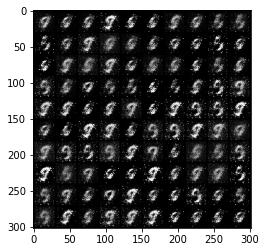

Epoch [1/200], Step [200/600], d_loss: 0.1891, g_loss: 6.0147, D(x): 0.95, D(G(z)): 0.08
Epoch [1/200], Step [400/600], d_loss: 0.1484, g_loss: 5.5050, D(x): 0.95, D(G(z)): 0.03
Epoch [1/200], Step [600/600], d_loss: 0.0753, g_loss: 5.8006, D(x): 0.96, D(G(z)): 0.02
Epoch [2/200], Step [200/600], d_loss: 0.2285, g_loss: 4.5665, D(x): 0.91, D(G(z)): 0.03
Epoch [2/200], Step [400/600], d_loss: 0.0860, g_loss: 5.4088, D(x): 0.98, D(G(z)): 0.05
Epoch [2/200], Step [600/600], d_loss: 0.1575, g_loss: 6.0663, D(x): 0.93, D(G(z)): 0.02
Epoch [3/200], Step [200/600], d_loss: 0.3273, g_loss: 5.1250, D(x): 0.91, D(G(z)): 0.05
Epoch [3/200], Step [400/600], d_loss: 0.5393, g_loss: 4.5862, D(x): 0.88, D(G(z)): 0.13
Epoch [3/200], Step [600/600], d_loss: 0.2694, g_loss: 5.0468, D(x): 0.92, D(G(z)): 0.07
Epoch [4/200], Step [200/600], d_loss: 0.4234, g_loss: 4.9023, D(x): 0.90, D(G(z)): 0.12
Epoch [4/200], Step [400/600], d_loss: 0.3259, g_loss: 4.5871, D(x): 0.90, D(G(z)): 0.06
Epoch [4/200], Step [

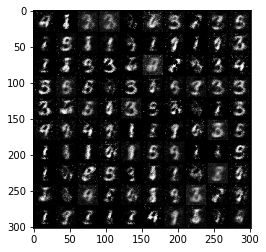

Epoch [11/200], Step [200/600], d_loss: 0.4770, g_loss: 3.6688, D(x): 0.83, D(G(z)): 0.08
Epoch [11/200], Step [400/600], d_loss: 0.5370, g_loss: 3.9804, D(x): 0.85, D(G(z)): 0.08
Epoch [11/200], Step [600/600], d_loss: 0.3485, g_loss: 3.9009, D(x): 0.91, D(G(z)): 0.11
Epoch [12/200], Step [200/600], d_loss: 0.3122, g_loss: 4.6356, D(x): 0.88, D(G(z)): 0.03
Epoch [12/200], Step [400/600], d_loss: 0.4454, g_loss: 3.7720, D(x): 0.86, D(G(z)): 0.08
Epoch [12/200], Step [600/600], d_loss: 0.4047, g_loss: 5.0229, D(x): 0.85, D(G(z)): 0.08
Epoch [13/200], Step [200/600], d_loss: 0.5146, g_loss: 4.1998, D(x): 0.89, D(G(z)): 0.19
Epoch [13/200], Step [400/600], d_loss: 0.3244, g_loss: 4.3006, D(x): 0.90, D(G(z)): 0.10
Epoch [13/200], Step [600/600], d_loss: 0.3859, g_loss: 3.6661, D(x): 0.91, D(G(z)): 0.16
Epoch [14/200], Step [200/600], d_loss: 0.4631, g_loss: 3.3672, D(x): 0.90, D(G(z)): 0.16
Epoch [14/200], Step [400/600], d_loss: 0.5454, g_loss: 3.7946, D(x): 0.86, D(G(z)): 0.14
Epoch [14/

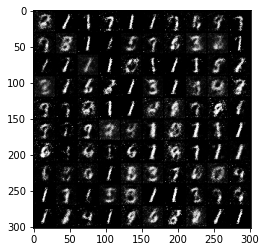

Epoch [21/200], Step [200/600], d_loss: 0.4439, g_loss: 3.2402, D(x): 0.86, D(G(z)): 0.09
Epoch [21/200], Step [400/600], d_loss: 0.3873, g_loss: 3.8833, D(x): 0.91, D(G(z)): 0.15
Epoch [21/200], Step [600/600], d_loss: 0.3487, g_loss: 3.4441, D(x): 0.88, D(G(z)): 0.07
Epoch [22/200], Step [200/600], d_loss: 0.3429, g_loss: 2.8113, D(x): 0.86, D(G(z)): 0.08
Epoch [22/200], Step [400/600], d_loss: 0.4997, g_loss: 3.0824, D(x): 0.84, D(G(z)): 0.13
Epoch [22/200], Step [600/600], d_loss: 0.6051, g_loss: 2.9269, D(x): 0.84, D(G(z)): 0.16
Epoch [23/200], Step [200/600], d_loss: 0.7138, g_loss: 2.5838, D(x): 0.82, D(G(z)): 0.24
Epoch [23/200], Step [400/600], d_loss: 0.4550, g_loss: 3.2496, D(x): 0.88, D(G(z)): 0.16
Epoch [23/200], Step [600/600], d_loss: 0.6988, g_loss: 3.6216, D(x): 0.74, D(G(z)): 0.07
Epoch [24/200], Step [200/600], d_loss: 0.6621, g_loss: 2.0835, D(x): 0.86, D(G(z)): 0.24
Epoch [24/200], Step [400/600], d_loss: 0.5570, g_loss: 2.8423, D(x): 0.84, D(G(z)): 0.14
Epoch [24/

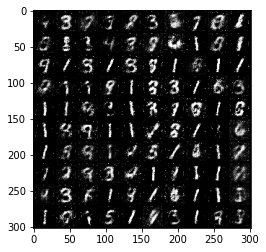

Epoch [31/200], Step [200/600], d_loss: 0.4986, g_loss: 2.2785, D(x): 0.91, D(G(z)): 0.21
Epoch [31/200], Step [400/600], d_loss: 0.4787, g_loss: 2.3351, D(x): 0.84, D(G(z)): 0.11
Epoch [31/200], Step [600/600], d_loss: 0.4256, g_loss: 2.5993, D(x): 0.85, D(G(z)): 0.13
Epoch [32/200], Step [200/600], d_loss: 0.4762, g_loss: 3.0593, D(x): 0.87, D(G(z)): 0.19
Epoch [32/200], Step [400/600], d_loss: 0.6564, g_loss: 2.5233, D(x): 0.73, D(G(z)): 0.09
Epoch [32/200], Step [600/600], d_loss: 0.6324, g_loss: 2.1065, D(x): 0.77, D(G(z)): 0.17
Epoch [33/200], Step [200/600], d_loss: 0.7817, g_loss: 2.5180, D(x): 0.79, D(G(z)): 0.23
Epoch [33/200], Step [400/600], d_loss: 0.5911, g_loss: 2.5954, D(x): 0.83, D(G(z)): 0.20
Epoch [33/200], Step [600/600], d_loss: 0.4655, g_loss: 3.0017, D(x): 0.86, D(G(z)): 0.17
Epoch [34/200], Step [200/600], d_loss: 0.7913, g_loss: 2.0134, D(x): 0.83, D(G(z)): 0.31
Epoch [34/200], Step [400/600], d_loss: 0.5644, g_loss: 3.1228, D(x): 0.79, D(G(z)): 0.14
Epoch [34/

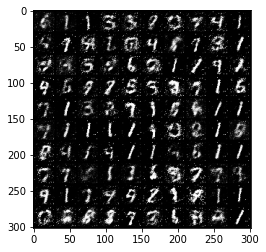

Epoch [41/200], Step [200/600], d_loss: 0.3942, g_loss: 3.3574, D(x): 0.85, D(G(z)): 0.12
Epoch [41/200], Step [400/600], d_loss: 0.5025, g_loss: 2.3796, D(x): 0.85, D(G(z)): 0.18
Epoch [41/200], Step [600/600], d_loss: 0.8604, g_loss: 3.0372, D(x): 0.76, D(G(z)): 0.21
Epoch [42/200], Step [200/600], d_loss: 0.5066, g_loss: 3.1533, D(x): 0.90, D(G(z)): 0.23
Epoch [42/200], Step [400/600], d_loss: 0.6896, g_loss: 1.8853, D(x): 0.80, D(G(z)): 0.24
Epoch [42/200], Step [600/600], d_loss: 0.5628, g_loss: 2.5260, D(x): 0.82, D(G(z)): 0.16
Epoch [43/200], Step [200/600], d_loss: 0.4191, g_loss: 3.0077, D(x): 0.86, D(G(z)): 0.15
Epoch [43/200], Step [400/600], d_loss: 0.4722, g_loss: 3.1261, D(x): 0.83, D(G(z)): 0.15
Epoch [43/200], Step [600/600], d_loss: 0.3895, g_loss: 3.4180, D(x): 0.88, D(G(z)): 0.13
Epoch [44/200], Step [200/600], d_loss: 0.9156, g_loss: 2.2476, D(x): 0.81, D(G(z)): 0.36
Epoch [44/200], Step [400/600], d_loss: 0.4989, g_loss: 2.3957, D(x): 0.84, D(G(z)): 0.18
Epoch [44/

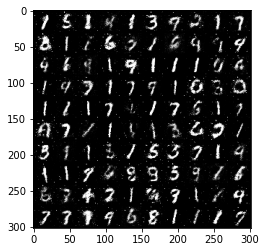

Epoch [51/200], Step [200/600], d_loss: 0.7273, g_loss: 1.5676, D(x): 0.83, D(G(z)): 0.28
Epoch [51/200], Step [400/600], d_loss: 0.6910, g_loss: 2.4355, D(x): 0.81, D(G(z)): 0.24
Epoch [51/200], Step [600/600], d_loss: 0.5515, g_loss: 2.4424, D(x): 0.85, D(G(z)): 0.22
Epoch [52/200], Step [200/600], d_loss: 0.7154, g_loss: 1.8401, D(x): 0.78, D(G(z)): 0.18
Epoch [52/200], Step [400/600], d_loss: 0.6433, g_loss: 3.4500, D(x): 0.75, D(G(z)): 0.12
Epoch [52/200], Step [600/600], d_loss: 0.5335, g_loss: 3.3317, D(x): 0.83, D(G(z)): 0.12
Epoch [53/200], Step [200/600], d_loss: 0.4011, g_loss: 3.3849, D(x): 0.89, D(G(z)): 0.15
Epoch [53/200], Step [400/600], d_loss: 0.6473, g_loss: 2.4395, D(x): 0.81, D(G(z)): 0.22
Epoch [53/200], Step [600/600], d_loss: 0.5737, g_loss: 2.9135, D(x): 0.78, D(G(z)): 0.14
Epoch [54/200], Step [200/600], d_loss: 0.7052, g_loss: 2.1594, D(x): 0.78, D(G(z)): 0.21
Epoch [54/200], Step [400/600], d_loss: 0.9116, g_loss: 1.7490, D(x): 0.76, D(G(z)): 0.31
Epoch [54/

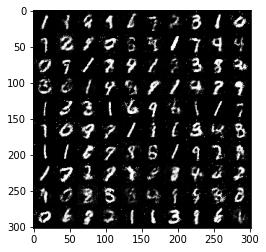

Epoch [61/200], Step [200/600], d_loss: 0.5895, g_loss: 1.9844, D(x): 0.83, D(G(z)): 0.24
Epoch [61/200], Step [400/600], d_loss: 0.6331, g_loss: 1.7934, D(x): 0.81, D(G(z)): 0.23
Epoch [61/200], Step [600/600], d_loss: 0.8509, g_loss: 1.8073, D(x): 0.73, D(G(z)): 0.25
Epoch [62/200], Step [200/600], d_loss: 0.7220, g_loss: 1.9346, D(x): 0.81, D(G(z)): 0.28
Epoch [62/200], Step [400/600], d_loss: 0.6892, g_loss: 2.2133, D(x): 0.71, D(G(z)): 0.18
Epoch [62/200], Step [600/600], d_loss: 0.6399, g_loss: 2.6331, D(x): 0.77, D(G(z)): 0.18
Epoch [63/200], Step [200/600], d_loss: 0.7548, g_loss: 1.7236, D(x): 0.79, D(G(z)): 0.29
Epoch [63/200], Step [400/600], d_loss: 0.7771, g_loss: 1.6362, D(x): 0.72, D(G(z)): 0.22
Epoch [63/200], Step [600/600], d_loss: 0.5721, g_loss: 2.6535, D(x): 0.80, D(G(z)): 0.18
Epoch [64/200], Step [200/600], d_loss: 0.9695, g_loss: 2.2726, D(x): 0.78, D(G(z)): 0.37
Epoch [64/200], Step [400/600], d_loss: 0.6241, g_loss: 2.0303, D(x): 0.76, D(G(z)): 0.16
Epoch [64/

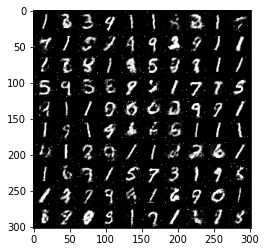

Epoch [71/200], Step [200/600], d_loss: 0.6277, g_loss: 2.3414, D(x): 0.78, D(G(z)): 0.19
Epoch [71/200], Step [400/600], d_loss: 0.7064, g_loss: 2.0079, D(x): 0.75, D(G(z)): 0.17
Epoch [71/200], Step [600/600], d_loss: 1.0229, g_loss: 1.9953, D(x): 0.60, D(G(z)): 0.19
Epoch [72/200], Step [200/600], d_loss: 0.7181, g_loss: 1.6284, D(x): 0.82, D(G(z)): 0.28
Epoch [72/200], Step [400/600], d_loss: 0.7248, g_loss: 2.3690, D(x): 0.75, D(G(z)): 0.21
Epoch [72/200], Step [600/600], d_loss: 0.8667, g_loss: 2.0815, D(x): 0.69, D(G(z)): 0.23
Epoch [73/200], Step [200/600], d_loss: 0.7772, g_loss: 1.3809, D(x): 0.74, D(G(z)): 0.26
Epoch [73/200], Step [400/600], d_loss: 0.6755, g_loss: 2.3728, D(x): 0.76, D(G(z)): 0.20
Epoch [73/200], Step [600/600], d_loss: 0.6053, g_loss: 2.2699, D(x): 0.78, D(G(z)): 0.19
Epoch [74/200], Step [200/600], d_loss: 0.8900, g_loss: 2.2959, D(x): 0.73, D(G(z)): 0.30
Epoch [74/200], Step [400/600], d_loss: 1.0476, g_loss: 1.4712, D(x): 0.83, D(G(z)): 0.44
Epoch [74/

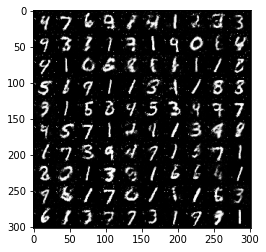

Epoch [81/200], Step [200/600], d_loss: 0.5127, g_loss: 1.9638, D(x): 0.83, D(G(z)): 0.18
Epoch [81/200], Step [400/600], d_loss: 0.6345, g_loss: 1.9540, D(x): 0.76, D(G(z)): 0.19
Epoch [81/200], Step [600/600], d_loss: 0.6585, g_loss: 1.6189, D(x): 0.79, D(G(z)): 0.25
Epoch [82/200], Step [200/600], d_loss: 0.8959, g_loss: 1.4339, D(x): 0.82, D(G(z)): 0.39
Epoch [82/200], Step [400/600], d_loss: 0.6414, g_loss: 2.0850, D(x): 0.81, D(G(z)): 0.25
Epoch [82/200], Step [600/600], d_loss: 0.7623, g_loss: 1.7460, D(x): 0.81, D(G(z)): 0.31
Epoch [83/200], Step [200/600], d_loss: 0.9662, g_loss: 2.0621, D(x): 0.63, D(G(z)): 0.22
Epoch [83/200], Step [400/600], d_loss: 0.6979, g_loss: 1.8743, D(x): 0.78, D(G(z)): 0.24
Epoch [83/200], Step [600/600], d_loss: 0.5910, g_loss: 2.0876, D(x): 0.84, D(G(z)): 0.25
Epoch [84/200], Step [200/600], d_loss: 0.6141, g_loss: 2.4908, D(x): 0.81, D(G(z)): 0.21
Epoch [84/200], Step [400/600], d_loss: 0.9216, g_loss: 1.6629, D(x): 0.75, D(G(z)): 0.34
Epoch [84/

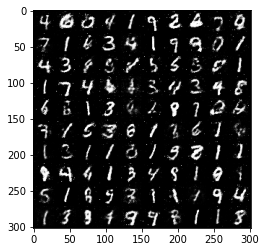

Epoch [91/200], Step [200/600], d_loss: 0.7731, g_loss: 1.7709, D(x): 0.69, D(G(z)): 0.21
Epoch [91/200], Step [400/600], d_loss: 0.8012, g_loss: 1.9720, D(x): 0.69, D(G(z)): 0.16
Epoch [91/200], Step [600/600], d_loss: 0.7122, g_loss: 2.1465, D(x): 0.79, D(G(z)): 0.26
Epoch [92/200], Step [200/600], d_loss: 0.6871, g_loss: 1.9452, D(x): 0.80, D(G(z)): 0.27
Epoch [92/200], Step [400/600], d_loss: 0.5843, g_loss: 2.1971, D(x): 0.76, D(G(z)): 0.16
Epoch [92/200], Step [600/600], d_loss: 0.8814, g_loss: 1.2509, D(x): 0.77, D(G(z)): 0.35
Epoch [93/200], Step [200/600], d_loss: 0.7152, g_loss: 2.3122, D(x): 0.76, D(G(z)): 0.24
Epoch [93/200], Step [400/600], d_loss: 0.8219, g_loss: 1.9275, D(x): 0.72, D(G(z)): 0.26
Epoch [93/200], Step [600/600], d_loss: 1.0706, g_loss: 1.1917, D(x): 0.83, D(G(z)): 0.41
Epoch [94/200], Step [200/600], d_loss: 0.8477, g_loss: 1.5485, D(x): 0.76, D(G(z)): 0.32
Epoch [94/200], Step [400/600], d_loss: 0.8082, g_loss: 2.1189, D(x): 0.73, D(G(z)): 0.26
Epoch [94/

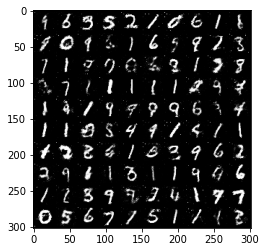

Epoch [101/200], Step [200/600], d_loss: 0.8714, g_loss: 1.7912, D(x): 0.70, D(G(z)): 0.26
Epoch [101/200], Step [400/600], d_loss: 0.7679, g_loss: 1.5018, D(x): 0.69, D(G(z)): 0.19
Epoch [101/200], Step [600/600], d_loss: 0.7073, g_loss: 2.1108, D(x): 0.75, D(G(z)): 0.24
Epoch [102/200], Step [200/600], d_loss: 0.6610, g_loss: 2.1622, D(x): 0.77, D(G(z)): 0.23
Epoch [102/200], Step [400/600], d_loss: 0.9074, g_loss: 1.8595, D(x): 0.70, D(G(z)): 0.29
Epoch [102/200], Step [600/600], d_loss: 0.6591, g_loss: 2.0907, D(x): 0.77, D(G(z)): 0.24
Epoch [103/200], Step [200/600], d_loss: 0.8073, g_loss: 1.4503, D(x): 0.72, D(G(z)): 0.26
Epoch [103/200], Step [400/600], d_loss: 0.9858, g_loss: 1.9560, D(x): 0.70, D(G(z)): 0.32
Epoch [103/200], Step [600/600], d_loss: 0.8946, g_loss: 2.1387, D(x): 0.79, D(G(z)): 0.35
Epoch [104/200], Step [200/600], d_loss: 0.7086, g_loss: 1.8932, D(x): 0.77, D(G(z)): 0.25
Epoch [104/200], Step [400/600], d_loss: 1.0254, g_loss: 2.1563, D(x): 0.58, D(G(z)): 0.14

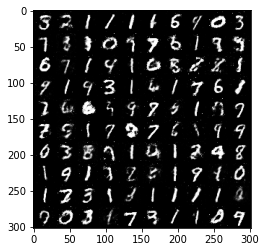

Epoch [111/200], Step [200/600], d_loss: 1.1123, g_loss: 1.5259, D(x): 0.67, D(G(z)): 0.35
Epoch [111/200], Step [400/600], d_loss: 0.7953, g_loss: 1.8941, D(x): 0.76, D(G(z)): 0.28
Epoch [111/200], Step [600/600], d_loss: 1.3167, g_loss: 1.2333, D(x): 0.59, D(G(z)): 0.33
Epoch [112/200], Step [200/600], d_loss: 0.8375, g_loss: 1.4451, D(x): 0.79, D(G(z)): 0.34
Epoch [112/200], Step [400/600], d_loss: 0.7539, g_loss: 2.0793, D(x): 0.78, D(G(z)): 0.30
Epoch [112/200], Step [600/600], d_loss: 1.0297, g_loss: 2.2627, D(x): 0.65, D(G(z)): 0.26
Epoch [113/200], Step [200/600], d_loss: 0.9003, g_loss: 2.4377, D(x): 0.64, D(G(z)): 0.16
Epoch [113/200], Step [400/600], d_loss: 0.7288, g_loss: 2.0579, D(x): 0.79, D(G(z)): 0.29
Epoch [113/200], Step [600/600], d_loss: 0.9744, g_loss: 1.8918, D(x): 0.71, D(G(z)): 0.31
Epoch [114/200], Step [200/600], d_loss: 0.9692, g_loss: 1.3007, D(x): 0.72, D(G(z)): 0.33
Epoch [114/200], Step [400/600], d_loss: 0.6975, g_loss: 1.9782, D(x): 0.76, D(G(z)): 0.25

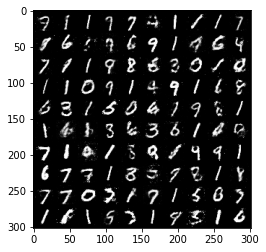

Epoch [121/200], Step [200/600], d_loss: 0.9213, g_loss: 1.3200, D(x): 0.75, D(G(z)): 0.35
Epoch [121/200], Step [400/600], d_loss: 0.9871, g_loss: 1.8030, D(x): 0.77, D(G(z)): 0.41
Epoch [121/200], Step [600/600], d_loss: 0.8224, g_loss: 1.3995, D(x): 0.70, D(G(z)): 0.26
Epoch [122/200], Step [200/600], d_loss: 0.9892, g_loss: 1.8588, D(x): 0.68, D(G(z)): 0.31
Epoch [122/200], Step [400/600], d_loss: 1.0547, g_loss: 1.8102, D(x): 0.67, D(G(z)): 0.33
Epoch [122/200], Step [600/600], d_loss: 0.8023, g_loss: 1.4950, D(x): 0.68, D(G(z)): 0.23
Epoch [123/200], Step [200/600], d_loss: 0.9562, g_loss: 1.6432, D(x): 0.67, D(G(z)): 0.30
Epoch [123/200], Step [400/600], d_loss: 0.9426, g_loss: 1.6835, D(x): 0.68, D(G(z)): 0.29
Epoch [123/200], Step [600/600], d_loss: 0.7888, g_loss: 1.4600, D(x): 0.75, D(G(z)): 0.29
Epoch [124/200], Step [200/600], d_loss: 0.9263, g_loss: 1.5853, D(x): 0.68, D(G(z)): 0.30
Epoch [124/200], Step [400/600], d_loss: 0.9213, g_loss: 1.8648, D(x): 0.67, D(G(z)): 0.26

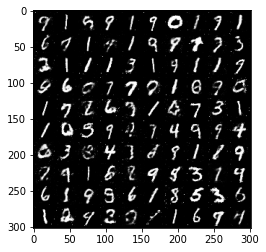

Epoch [131/200], Step [200/600], d_loss: 0.9080, g_loss: 1.7145, D(x): 0.70, D(G(z)): 0.28
Epoch [131/200], Step [400/600], d_loss: 0.6563, g_loss: 1.6644, D(x): 0.76, D(G(z)): 0.23
Epoch [131/200], Step [600/600], d_loss: 0.9195, g_loss: 1.6016, D(x): 0.73, D(G(z)): 0.35
Epoch [132/200], Step [200/600], d_loss: 0.8053, g_loss: 1.7780, D(x): 0.70, D(G(z)): 0.24
Epoch [132/200], Step [400/600], d_loss: 0.9572, g_loss: 1.5904, D(x): 0.69, D(G(z)): 0.34
Epoch [132/200], Step [600/600], d_loss: 1.0704, g_loss: 1.3992, D(x): 0.60, D(G(z)): 0.27
Epoch [133/200], Step [200/600], d_loss: 1.0643, g_loss: 1.4382, D(x): 0.70, D(G(z)): 0.35
Epoch [133/200], Step [400/600], d_loss: 0.9535, g_loss: 1.4476, D(x): 0.70, D(G(z)): 0.33
Epoch [133/200], Step [600/600], d_loss: 0.9137, g_loss: 2.3718, D(x): 0.65, D(G(z)): 0.22
Epoch [134/200], Step [200/600], d_loss: 0.9827, g_loss: 1.1429, D(x): 0.68, D(G(z)): 0.29
Epoch [134/200], Step [400/600], d_loss: 0.9292, g_loss: 1.4638, D(x): 0.70, D(G(z)): 0.30

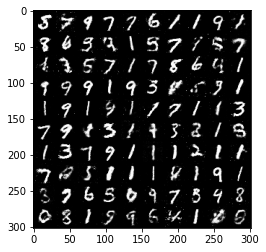

Epoch [141/200], Step [200/600], d_loss: 0.9266, g_loss: 1.7636, D(x): 0.71, D(G(z)): 0.32
Epoch [141/200], Step [400/600], d_loss: 1.1399, g_loss: 1.6531, D(x): 0.62, D(G(z)): 0.32
Epoch [141/200], Step [600/600], d_loss: 0.9420, g_loss: 1.6841, D(x): 0.63, D(G(z)): 0.24
Epoch [142/200], Step [200/600], d_loss: 0.8950, g_loss: 2.0742, D(x): 0.63, D(G(z)): 0.20
Epoch [142/200], Step [400/600], d_loss: 0.9284, g_loss: 1.8185, D(x): 0.67, D(G(z)): 0.27
Epoch [142/200], Step [600/600], d_loss: 0.8464, g_loss: 1.6583, D(x): 0.68, D(G(z)): 0.26
Epoch [143/200], Step [200/600], d_loss: 1.0228, g_loss: 1.5635, D(x): 0.59, D(G(z)): 0.23
Epoch [143/200], Step [400/600], d_loss: 0.8847, g_loss: 1.8926, D(x): 0.66, D(G(z)): 0.24
Epoch [143/200], Step [600/600], d_loss: 0.6906, g_loss: 2.0146, D(x): 0.73, D(G(z)): 0.23
Epoch [144/200], Step [200/600], d_loss: 0.7600, g_loss: 1.5096, D(x): 0.72, D(G(z)): 0.26
Epoch [144/200], Step [400/600], d_loss: 0.9482, g_loss: 1.6369, D(x): 0.63, D(G(z)): 0.22

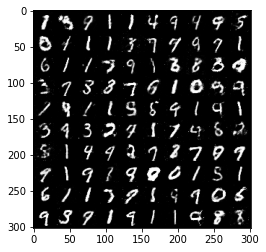

Epoch [151/200], Step [200/600], d_loss: 0.9530, g_loss: 1.4774, D(x): 0.69, D(G(z)): 0.32
Epoch [151/200], Step [400/600], d_loss: 0.7627, g_loss: 1.4260, D(x): 0.76, D(G(z)): 0.29
Epoch [151/200], Step [600/600], d_loss: 0.9873, g_loss: 1.9782, D(x): 0.62, D(G(z)): 0.26
Epoch [152/200], Step [200/600], d_loss: 0.8077, g_loss: 1.6998, D(x): 0.70, D(G(z)): 0.25
Epoch [152/200], Step [400/600], d_loss: 0.8848, g_loss: 2.0553, D(x): 0.63, D(G(z)): 0.21
Epoch [152/200], Step [600/600], d_loss: 1.1256, g_loss: 1.7069, D(x): 0.67, D(G(z)): 0.36
Epoch [153/200], Step [200/600], d_loss: 0.9053, g_loss: 1.1530, D(x): 0.74, D(G(z)): 0.35
Epoch [153/200], Step [400/600], d_loss: 0.9479, g_loss: 1.7162, D(x): 0.73, D(G(z)): 0.35
Epoch [153/200], Step [600/600], d_loss: 0.9129, g_loss: 1.6498, D(x): 0.66, D(G(z)): 0.25
Epoch [154/200], Step [200/600], d_loss: 0.9360, g_loss: 1.8109, D(x): 0.71, D(G(z)): 0.31
Epoch [154/200], Step [400/600], d_loss: 0.9909, g_loss: 1.2790, D(x): 0.68, D(G(z)): 0.35

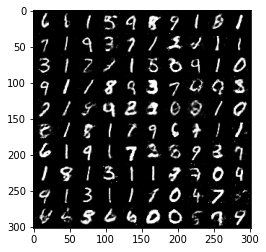

Epoch [161/200], Step [200/600], d_loss: 0.8898, g_loss: 1.5013, D(x): 0.64, D(G(z)): 0.23
Epoch [161/200], Step [400/600], d_loss: 0.7978, g_loss: 1.5191, D(x): 0.74, D(G(z)): 0.31
Epoch [161/200], Step [600/600], d_loss: 0.9775, g_loss: 1.0853, D(x): 0.71, D(G(z)): 0.36
Epoch [162/200], Step [200/600], d_loss: 1.0771, g_loss: 1.0433, D(x): 0.66, D(G(z)): 0.35
Epoch [162/200], Step [400/600], d_loss: 0.9643, g_loss: 1.4630, D(x): 0.67, D(G(z)): 0.30
Epoch [162/200], Step [600/600], d_loss: 0.9545, g_loss: 2.0497, D(x): 0.66, D(G(z)): 0.27
Epoch [163/200], Step [200/600], d_loss: 0.8738, g_loss: 1.6323, D(x): 0.71, D(G(z)): 0.31
Epoch [163/200], Step [400/600], d_loss: 0.9820, g_loss: 1.5083, D(x): 0.66, D(G(z)): 0.30
Epoch [163/200], Step [600/600], d_loss: 0.7319, g_loss: 1.3578, D(x): 0.77, D(G(z)): 0.30
Epoch [164/200], Step [200/600], d_loss: 1.1818, g_loss: 1.3303, D(x): 0.70, D(G(z)): 0.42
Epoch [164/200], Step [400/600], d_loss: 0.9077, g_loss: 1.6094, D(x): 0.66, D(G(z)): 0.25

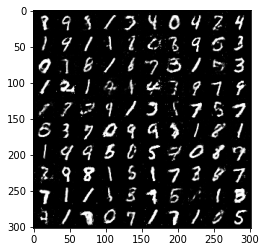

Epoch [171/200], Step [200/600], d_loss: 1.0456, g_loss: 1.4392, D(x): 0.66, D(G(z)): 0.31
Epoch [171/200], Step [400/600], d_loss: 0.9604, g_loss: 1.6691, D(x): 0.69, D(G(z)): 0.32
Epoch [171/200], Step [600/600], d_loss: 0.8686, g_loss: 1.6644, D(x): 0.75, D(G(z)): 0.33
Epoch [172/200], Step [200/600], d_loss: 0.9157, g_loss: 1.4698, D(x): 0.75, D(G(z)): 0.38
Epoch [172/200], Step [400/600], d_loss: 0.8941, g_loss: 1.4869, D(x): 0.75, D(G(z)): 0.36
Epoch [172/200], Step [600/600], d_loss: 0.9575, g_loss: 1.5896, D(x): 0.73, D(G(z)): 0.30
Epoch [173/200], Step [200/600], d_loss: 0.7828, g_loss: 1.7958, D(x): 0.68, D(G(z)): 0.20
Epoch [173/200], Step [400/600], d_loss: 0.7049, g_loss: 1.8384, D(x): 0.78, D(G(z)): 0.29
Epoch [173/200], Step [600/600], d_loss: 0.9814, g_loss: 1.5902, D(x): 0.69, D(G(z)): 0.33
Epoch [174/200], Step [200/600], d_loss: 0.8329, g_loss: 1.4690, D(x): 0.74, D(G(z)): 0.29
Epoch [174/200], Step [400/600], d_loss: 1.0478, g_loss: 1.6608, D(x): 0.58, D(G(z)): 0.25

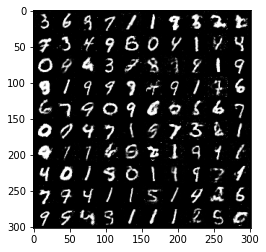

Epoch [181/200], Step [200/600], d_loss: 1.1104, g_loss: 1.4817, D(x): 0.69, D(G(z)): 0.39
Epoch [181/200], Step [400/600], d_loss: 1.0232, g_loss: 1.6438, D(x): 0.67, D(G(z)): 0.32
Epoch [181/200], Step [600/600], d_loss: 0.9779, g_loss: 1.6079, D(x): 0.66, D(G(z)): 0.31
Epoch [182/200], Step [200/600], d_loss: 0.9689, g_loss: 1.1800, D(x): 0.76, D(G(z)): 0.40
Epoch [182/200], Step [400/600], d_loss: 0.9639, g_loss: 1.3435, D(x): 0.65, D(G(z)): 0.30
Epoch [182/200], Step [600/600], d_loss: 0.7529, g_loss: 1.5581, D(x): 0.75, D(G(z)): 0.26
Epoch [183/200], Step [200/600], d_loss: 1.1217, g_loss: 1.2881, D(x): 0.77, D(G(z)): 0.48
Epoch [183/200], Step [400/600], d_loss: 1.0569, g_loss: 1.7098, D(x): 0.61, D(G(z)): 0.27
Epoch [183/200], Step [600/600], d_loss: 0.9936, g_loss: 1.4352, D(x): 0.67, D(G(z)): 0.33
Epoch [184/200], Step [200/600], d_loss: 0.9942, g_loss: 1.7639, D(x): 0.67, D(G(z)): 0.33
Epoch [184/200], Step [400/600], d_loss: 0.8840, g_loss: 1.4983, D(x): 0.69, D(G(z)): 0.31

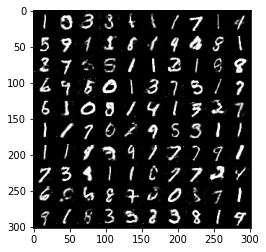

Epoch [191/200], Step [200/600], d_loss: 1.0857, g_loss: 1.5221, D(x): 0.58, D(G(z)): 0.27
Epoch [191/200], Step [400/600], d_loss: 1.0463, g_loss: 1.2495, D(x): 0.69, D(G(z)): 0.38
Epoch [191/200], Step [600/600], d_loss: 1.0659, g_loss: 1.5780, D(x): 0.69, D(G(z)): 0.36
Epoch [192/200], Step [200/600], d_loss: 0.8978, g_loss: 1.5749, D(x): 0.75, D(G(z)): 0.36
Epoch [192/200], Step [400/600], d_loss: 0.9411, g_loss: 1.6909, D(x): 0.63, D(G(z)): 0.23
Epoch [192/200], Step [600/600], d_loss: 1.2028, g_loss: 1.5172, D(x): 0.55, D(G(z)): 0.31
Epoch [193/200], Step [200/600], d_loss: 0.7068, g_loss: 1.5785, D(x): 0.80, D(G(z)): 0.31
Epoch [193/200], Step [400/600], d_loss: 1.0329, g_loss: 1.4936, D(x): 0.63, D(G(z)): 0.31
Epoch [193/200], Step [600/600], d_loss: 0.9577, g_loss: 1.8136, D(x): 0.71, D(G(z)): 0.30
Epoch [194/200], Step [200/600], d_loss: 1.2116, g_loss: 1.3242, D(x): 0.56, D(G(z)): 0.32
Epoch [194/200], Step [400/600], d_loss: 0.9545, g_loss: 1.2317, D(x): 0.68, D(G(z)): 0.33

In [18]:
total_step=len(data_loader)
for epoch in range(num_epochs):
  for i, (images, _) in enumerate(data_loader):
    images = images.reshape(batch_size, -1).to(device='cuda')
    
    real_labels = torch.ones(batch_size, 1).to(device='cuda')
    fake_labels = torch.zeros(batch_size, 1).to(device='cuda')


    # Discriminator training
    
    #Compute BCE_Loss using real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Compute BCELoss using fake images
    z = torch.randn(batch_size, latent_size).to(device='cuda')
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop and optimize
    d_loss = d_loss_real + d_loss_fake

    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

    d_loss.backward()
    d_optimizer.step()


    # Generator training
    z = torch.randn(batch_size, latent_size).to(device='cuda')
    fake_images = G(z)
    outputs = D(fake_images)

    g_loss = criterion(outputs, real_labels)

    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

    g_loss.backward()
    g_optimizer.step()

    if (i+1) % 200 == 0:
      print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()))
    
    if i+1==total_step and epoch%10==0:
      fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
      grid_img = utils.make_grid(((fake_images.detach().cpu()+1)/2).clamp(0,1), nrow=10)
      plt.imshow(grid_img.permute(1, 2, 0))
      plt.show()

# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')